In [ ]:
import xarray as xr
import sys, os
sys.path.append("../src")
import READ_FILE

season = "ON"

# READ JRA55
tvar = "hgt"
tlev = 500
oz5003=READ_FILE.READ_JRA55(season,tvar,tlev)

tlev = 1000
oz10003 = READ_FILE.READ_JRA55(season,tvar,tlev)

tvar = "tmp2m"
ot2m3 = READ_FILE.READ_JRA55(season,tvar,tlev)

nyrs=oz5003['year'].size

# READ GloSea5
model0 = "GloSea5"
tvar = "hgt"
tlev = 500
mz5003_gc2 = READ_FILE.READ_GloSea5(season,tvar,tlev,model0)

tlev = 1000
mz10003_gc2 = READ_FILE.READ_GloSea5(season,tvar,tlev,model0)

tvar = "t15m"
mt2m3_gc2 = READ_FILE.READ_GloSea5(season,tvar,tlev,model0)

# READ GloSea6
model0 = "GloSea6"
tvar = "hgt"
tlev = 500
mz5003_gc32 = READ_FILE.READ_GloSea5(season,tvar,tlev,model0)

tlev = 1000
mz10003_gc32 = READ_FILE.READ_GloSea5(season,tvar,tlev,model0)

tvar = "t15m"
mt2m3_gc32 = READ_FILE.READ_GloSea5(season,tvar,tlev,model0)

oz5003.name       ="JRA_z500"
oz10003.name      ="JRA_z1000"
ot2m3.name        ="JRA_t2m"
mz5003_gc2.name   ="GloSea5_z500"
mz10003_gc2.name  ="GloSea5_z1000"
mt2m3_gc2.name    ="GloSea5_t2m"
mz5003_gc32.name  ="GloSea6_z500"
mz10003_gc32.name ="GloSea6_z1000"
mt2m3_gc32.name   ="GloSea6_t2m"

# oz5003
# oz10003
# ot2m3
# mz5003_gc2
# mz10003_gc2
# mt2m3_gc2
# mz5003_gc32
# mz10003_gc32
# mt2m3_gc32

jra=xr.merge([oz5003, oz10003, ot2m3], compat='override')
glosea5=xr.merge([mz5003_gc2, mz10003_gc2, mt2m3_gc2], compat='override')
glosea6=xr.merge([mz5003_gc32, mz10003_gc32, mt2m3_gc32], compat='override')

data=xr.merge([jra,glosea5,glosea6])
data.to_netcdf('../1.ACC_RMSE/data/annual_data.nc')

In [1]:
import numpy as np
import xarray as xr
import sys, os
sys.path.append("../src")
import NCL_FUNC

data=xr.open_dataset("../1.ACC_RMSE/data/annual_data.nc")
var_n=list(data.data_vars)
oz5003=data[var_n[0]]
oz10003=data[var_n[1]]
ot2m3=data[var_n[2]]
mz5003_gc2=data[var_n[3]]
mz10003_gc2=data[var_n[4]]
mt2m3_gc2=data[var_n[5]]
mz5003_gc32=data[var_n[6]]
mz10003_gc32=data[var_n[7]]
mt2m3_gc32=data[var_n[8]]

owgt=NCL_FUNC.latRegWgt(oz5003['latitude'])
wgt=owgt[owgt['latitude']>=20]
wgt.name='weights'

# START
# climatology
oz5003_clim  = oz5003.mean('year')
oz10003_clim = oz10003.mean('year')
ot2m3_clim   = ot2m3.mean('year')

mz5003_gc2_clim  = mz5003_gc2.mean('year')
mz10003_gc2_clim = mz10003_gc2.mean('year')
mt2m3_gc2_clim   = mt2m3_gc2.mean('year')

mz5003_gc32_clim  = mz5003_gc32.mean('year')
mz10003_gc32_clim = mz10003_gc32.mean('year')
mt2m3_gc32_clim   = mt2m3_gc32.mean('year')

# Anomaly
oz5003_ano       = oz5003-oz5003_clim
oz10003_ano      = oz10003-oz10003_clim
ot2m3_ano        = ot2m3-ot2m3_clim

mz5003_gc2_ano   = mz5003_gc2-mz5003_gc2_clim
mz10003_gc2_ano  = mz10003_gc2-mz10003_gc2_clim
mt2m3_gc2_ano    = mt2m3_gc2-mt2m3_gc2_clim

mz5003_gc32_ano  = mz5003_gc32-mz5003_gc32_clim
mz10003_gc32_ano = mz10003_gc32-mz10003_gc32_clim
mt2m3_gc32_ano   = mt2m3_gc32-mt2m3_gc32_clim

# bias
mz5003_cdiff_gc2   = mz5003_gc2_clim - oz5003_clim
mz10003_cdiff_gc2  = mz10003_gc2_clim - oz10003_clim
mt2m3_cdiff_gc2    = mt2m3_gc2_clim - ot2m3_clim

mz5003_cdiff_gc32  = mz5003_gc32_clim - oz5003_clim
mz10003_cdiff_gc32 = mz10003_gc32_clim - oz10003_clim
mt2m3_cdiff_gc32   = mt2m3_gc32_clim - ot2m3_clim
# END - climatology


# START - Calculate value for TS
reg_oz500       = oz5003_ano[:,oz5003_ano['latitude']>=20,:].weighted(wgt).mean(dim=["longitude","latitude"])
reg_oz1000      = oz10003_ano[:,oz10003_ano['latitude']>=20,:].weighted(wgt).mean(dim=["longitude","latitude"])
reg_ot2m        = ot2m3_ano[:,ot2m3_ano['latitude']>=20,:].weighted(wgt).mean(dim=["longitude","latitude"])

reg_mz500_gc2   = mz5003_gc2_ano[:,mz5003_gc2_ano['latitude']>=20,:].weighted(wgt).mean(dim=["longitude","latitude"])
reg_mz1000_gc2  = mz10003_gc2_ano[:,mz10003_gc2_ano['latitude']>=20,:].weighted(wgt).mean(dim=["longitude","latitude"])
reg_mt2m_gc2    = mt2m3_gc2_ano[:,mt2m3_gc2_ano['latitude']>=20,:].weighted(wgt).mean(dim=["longitude","latitude"])

reg_mz500_gc32  = mz5003_gc32_ano[:,mz5003_gc32_ano['latitude']>=20,:].weighted(wgt).mean(dim=["longitude","latitude"])
reg_mz1000_gc32 = mz10003_gc32_ano[:,mz10003_gc32_ano['latitude']>=20,:].weighted(wgt).mean(dim=["longitude","latitude"])
reg_mt2m_gc32   = mt2m3_gc32_ano[:,mt2m3_gc32_ano['latitude']>=20,:].weighted(wgt).mean(dim=["longitude","latitude"])

dreg_oz500       = NCL_FUNC.dtrend(reg_oz500)
dreg_oz1000      = NCL_FUNC.dtrend(reg_oz1000)
dreg_ot2m        = NCL_FUNC.dtrend(reg_ot2m)

dreg_mz500_gc2   = NCL_FUNC.dtrend(reg_mz500_gc2)
dreg_mz1000_gc2  = NCL_FUNC.dtrend(reg_mz1000_gc2)
dreg_mt2m_gc2    = NCL_FUNC.dtrend(reg_mt2m_gc2)

dreg_mz500_gc32  = NCL_FUNC.dtrend(reg_mz500_gc32)
dreg_mz1000_gc32 = NCL_FUNC.dtrend(reg_mz1000_gc32)
dreg_mt2m_gc32   = NCL_FUNC.dtrend(reg_mt2m_gc32)

cor_t2m_gc2     = NCL_FUNC.escorc(reg_ot2m,reg_mt2m_gc2)[0]
cor_z500_gc2    = NCL_FUNC.escorc(reg_oz500,reg_mz500_gc2)[0]
cor_z1000_gc2   = NCL_FUNC.escorc(reg_oz1000,reg_mz1000_gc2)[0]

cor_t2m_gc32    = NCL_FUNC.escorc(reg_ot2m,reg_mt2m_gc32)[0]
cor_z500_gc32   = NCL_FUNC.escorc(reg_oz500,reg_mz500_gc32)[0]
cor_z1000_gc32  = NCL_FUNC.escorc(reg_oz1000,reg_mz1000_gc32)[0]

dcor_t2m_gc2    = NCL_FUNC.escorc(dreg_ot2m,dreg_mt2m_gc2)[0]
dcor_z500_gc2   = NCL_FUNC.escorc(dreg_oz500,dreg_mz500_gc2)[0]
dcor_z1000_gc2  = NCL_FUNC.escorc(dreg_oz1000,dreg_mz1000_gc2)[0]

dcor_t2m_gc32   = NCL_FUNC.escorc(dreg_ot2m,dreg_mt2m_gc32)[0]
dcor_z500_gc32  = NCL_FUNC.escorc(dreg_oz500,dreg_mz500_gc32)[0]
dcor_z1000_gc32 = NCL_FUNC.escorc(dreg_oz1000,dreg_mz1000_gc32)[0]

rmse_t2m_gc2     = NCL_FUNC.dim_rmsd_n(reg_ot2m,reg_mt2m_gc2)
rmse_z500_gc2    = NCL_FUNC.dim_rmsd_n(reg_oz500,reg_mz500_gc2)
rmse_z1000_gc2   = NCL_FUNC.dim_rmsd_n(reg_oz1000,reg_mz1000_gc2)

rmse_t2m_gc32    = NCL_FUNC.dim_rmsd_n(reg_ot2m,reg_mt2m_gc32)
rmse_z500_gc32   = NCL_FUNC.dim_rmsd_n(reg_oz500,reg_mz500_gc32)
rmse_z1000_gc32  = NCL_FUNC.dim_rmsd_n(reg_oz1000,reg_mz1000_gc32)

drmse_t2m_gc2    = NCL_FUNC.dim_rmsd_n(dreg_ot2m,dreg_mt2m_gc2)
drmse_z500_gc2   = NCL_FUNC.dim_rmsd_n(dreg_oz500,dreg_mz500_gc2)
drmse_z1000_gc2  = NCL_FUNC.dim_rmsd_n(dreg_oz1000,dreg_mz1000_gc2)

drmse_t2m_gc32   = NCL_FUNC.dim_rmsd_n(dreg_ot2m,dreg_mt2m_gc32)
drmse_z500_gc32  = NCL_FUNC.dim_rmsd_n(dreg_oz500,dreg_mz500_gc32)
drmse_z1000_gc32 = NCL_FUNC.dim_rmsd_n(dreg_oz1000,dreg_mz1000_gc32)

# NRMSE add

nrmse_t2m_gc2    = rmse_t2m_gc2/(max(reg_ot2m)-min(reg_ot2m))
nrmse_z500_gc2   = rmse_z500_gc2/(max(reg_oz500)-min(reg_oz500))
nrmse_z1000_gc2  = rmse_z1000_gc2/(max(reg_oz1000)-min(reg_oz1000))

nrmse_t2m_gc32   = rmse_t2m_gc32/(max(reg_ot2m)-min(reg_ot2m))
nrmse_z500_gc32  = rmse_z500_gc32/(max(reg_oz500)-min(reg_oz500))
nrmse_z1000_gc32 = rmse_z1000_gc32/(max(reg_oz1000)-min(reg_oz1000))


dnrmse_t2m_gc2    = drmse_t2m_gc2/(max(dreg_ot2m)-min(dreg_ot2m))
dnrmse_z500_gc2   = drmse_z500_gc2/(max(dreg_oz500)-min(dreg_oz500))
dnrmse_z1000_gc2  = drmse_z1000_gc2/(max(dreg_oz1000)-min(dreg_oz1000))

dnrmse_t2m_gc32   = drmse_t2m_gc32/(max(dreg_ot2m)-min(dreg_ot2m))
dnrmse_z500_gc32  = drmse_z500_gc32/(max(dreg_oz500)-min(dreg_oz500))
dnrmse_z1000_gc32 = drmse_z1000_gc32/(max(dreg_oz1000)-min(dreg_oz1000))
#  END - Calculate value for TS

t2m3_acc_gc2    , tkc3_sig_gc2   = NCL_FUNC.escorc_n(mt2m3_gc2_ano,ot2m3_ano)
z5003_acc_gc2   , hkc3_sig_gc2   = NCL_FUNC.escorc_n(mz5003_gc2_ano,oz5003_ano)
z10003_acc_gc2  , hkc3_sig_gc22  = NCL_FUNC.escorc_n(mz10003_gc2_ano,oz10003_ano)

t2m3_acc_gc32   , tkc3_sig_gc32  = NCL_FUNC.escorc_n(mt2m3_gc32_ano,ot2m3_ano)
z5003_acc_gc32  , hkc3_sig_gc32  = NCL_FUNC.escorc_n(mz5003_gc32_ano,oz5003_ano)
z10003_acc_gc32 , hkc3_sig_gc322 = NCL_FUNC.escorc_n(mz10003_gc32_ano,oz10003_ano)

sig_lev = 0.05
sig_val = 0.5

tkc3_smap_gc2   = xr.where(tkc3_sig_gc2 > sig_lev, sig_val, sig_lev)
hkc3_smap_gc2   = xr.where(hkc3_sig_gc2 > sig_lev, sig_val, sig_lev)
hkc3_smap_gc22  = xr.where(hkc3_sig_gc22 > sig_lev, sig_val, sig_lev)

tkc3_smap_gc32  = xr.where(tkc3_sig_gc32 > sig_lev, sig_val, sig_lev)
hkc3_smap_gc32  = xr.where(hkc3_sig_gc32 > sig_lev, sig_val, sig_lev)
hkc3_smap_gc322 = xr.where(hkc3_sig_gc322 > sig_lev, sig_val, sig_lev)
# END - Calculate ACC for map

# START - Calculate average ACC map 
t2m_acc_gc2    = t2m3_acc_gc2[t2m3_acc_gc2['latitude']>=20,:].weighted(wgt).mean(dim=["longitude","latitude"])
t2m_acc_gc32   = t2m3_acc_gc32[t2m3_acc_gc32['latitude']>=20,:].weighted(wgt).mean(dim=["longitude","latitude"])

z1000_acc_gc2  = z10003_acc_gc2[z10003_acc_gc2['latitude']>=20,:].weighted(wgt).mean(dim=["longitude","latitude"])
z1000_acc_gc32 = z10003_acc_gc32[z10003_acc_gc32['latitude']>=20,:].weighted(wgt).mean(dim=["longitude","latitude"])

z500_acc_gc2   = z5003_acc_gc2[z5003_acc_gc2['latitude']>=20,:].weighted(wgt).mean(dim=["longitude","latitude"])
z500_acc_gc32  = z5003_acc_gc32[z5003_acc_gc32['latitude']>=20,:].weighted(wgt).mean(dim=["longitude","latitude"])
#  END - Calculate average ACC map
z5003_rmse_gc2   = NCL_FUNC.dim_rmsd_n_Wrap( oz5003, mz5003_gc2)
z5003_rmse_gc32  = NCL_FUNC.dim_rmsd_n_Wrap( oz5003, mz5003_gc32)

z10003_rmse_gc2  = NCL_FUNC.dim_rmsd_n_Wrap( oz10003, mz10003_gc2)
z10003_rmse_gc32 = NCL_FUNC.dim_rmsd_n_Wrap( oz10003, mz10003_gc32)

t2m3_rmse_gc2    = NCL_FUNC.dim_rmsd_n_Wrap( ot2m3, mt2m3_gc2)
t2m3_rmse_gc32   = NCL_FUNC.dim_rmsd_n_Wrap( ot2m3, mt2m3_gc32)

t2m_rmse_gc2    = t2m3_rmse_gc2[t2m3_rmse_gc2['latitude']>=20,:].weighted(wgt).mean(dim=["longitude","latitude"])
t2m_rmse_gc32   = t2m3_rmse_gc32[t2m3_rmse_gc32['latitude']>=20,:].weighted(wgt).mean(dim=["longitude","latitude"])

z1000_rmse_gc2  = z10003_rmse_gc2[z10003_rmse_gc2['latitude']>=20,:].weighted(wgt).mean(dim=["longitude","latitude"])
z1000_rmse_gc32 = z10003_rmse_gc32[z10003_rmse_gc32['latitude']>=20,:].weighted(wgt).mean(dim=["longitude","latitude"])

z500_rmse_gc2   = z5003_rmse_gc2[z5003_rmse_gc2['latitude']>=20,:].weighted(wgt).mean(dim=["longitude","latitude"])
z500_rmse_gc32  = z5003_rmse_gc32[z5003_rmse_gc32['latitude']>=20,:].weighted(wgt).mean(dim=["longitude","latitude"])

# reg_ot2m.name='JRA_rag'
# reg_mt2m_gc2.name='GloSea5_rag'
# reg_mt2m_gc32.name='GloSea6_rag'

# mt2m3_cdiff_gc2.name='GloSea5_diff'
# mt2m3_cdiff_gc32.name='GloSea6_diff'


# t2m3_acc_gc2.name='GloSea5_acc'
# tkc3_smap_gc2.name='GloSea5_smap'


# t2m3_acc_gc32.name='GloSea6_acc'
# tkc3_smap_gc32.name='GloSea6_smap'


# t2m3_rmse_gc2.name='GloSea5_rmse'
# t2m3_rmse_gc32.name='GloSea6_rmse'

# reg_ot2m
# reg_mt2m_gc2
# reg_mt2m_gc32
# mt2m3_cdiff_gc2
# mt2m3_cdiff_gc32
# t2m3_acc_gc2
# tkc3_smap_gc2
# t2m3_acc_gc32
# tkc3_smap_gc32
# t2m3_rmse_gc2
# t2m3_rmse_gc32


# reg=xr.merge([reg_ot2m,reg_mt2m_gc2,reg_mt2m_gc32], compat='override')
# bias=xr.merge([mt2m3_cdiff_gc2, mt2m3_cdiff_gc32], compat='override')
# acc=xr.merge([t2m3_acc_gc2,tkc3_smap_gc2,t2m3_acc_gc32, tkc3_smap_gc32], compat='override')
# rmse=xr.merge([t2m3_rmse_gc2, t2m3_rmse_gc32], compat='override')

# reg.to_netcdf("../1.ACC_RMSE/data/rag_post.nc")
# bias.to_netcdf("../1.ACC_RMSE/data/bias_post.nc")
# acc.to_netcdf("../1.ACC_RMSE/data/acc_post.nc")
# rmse.to_netcdf("../1.ACC_RMSE/data/rmse_post.nc")

<function matplotlib.pyplot.show(close=None, block=None)>

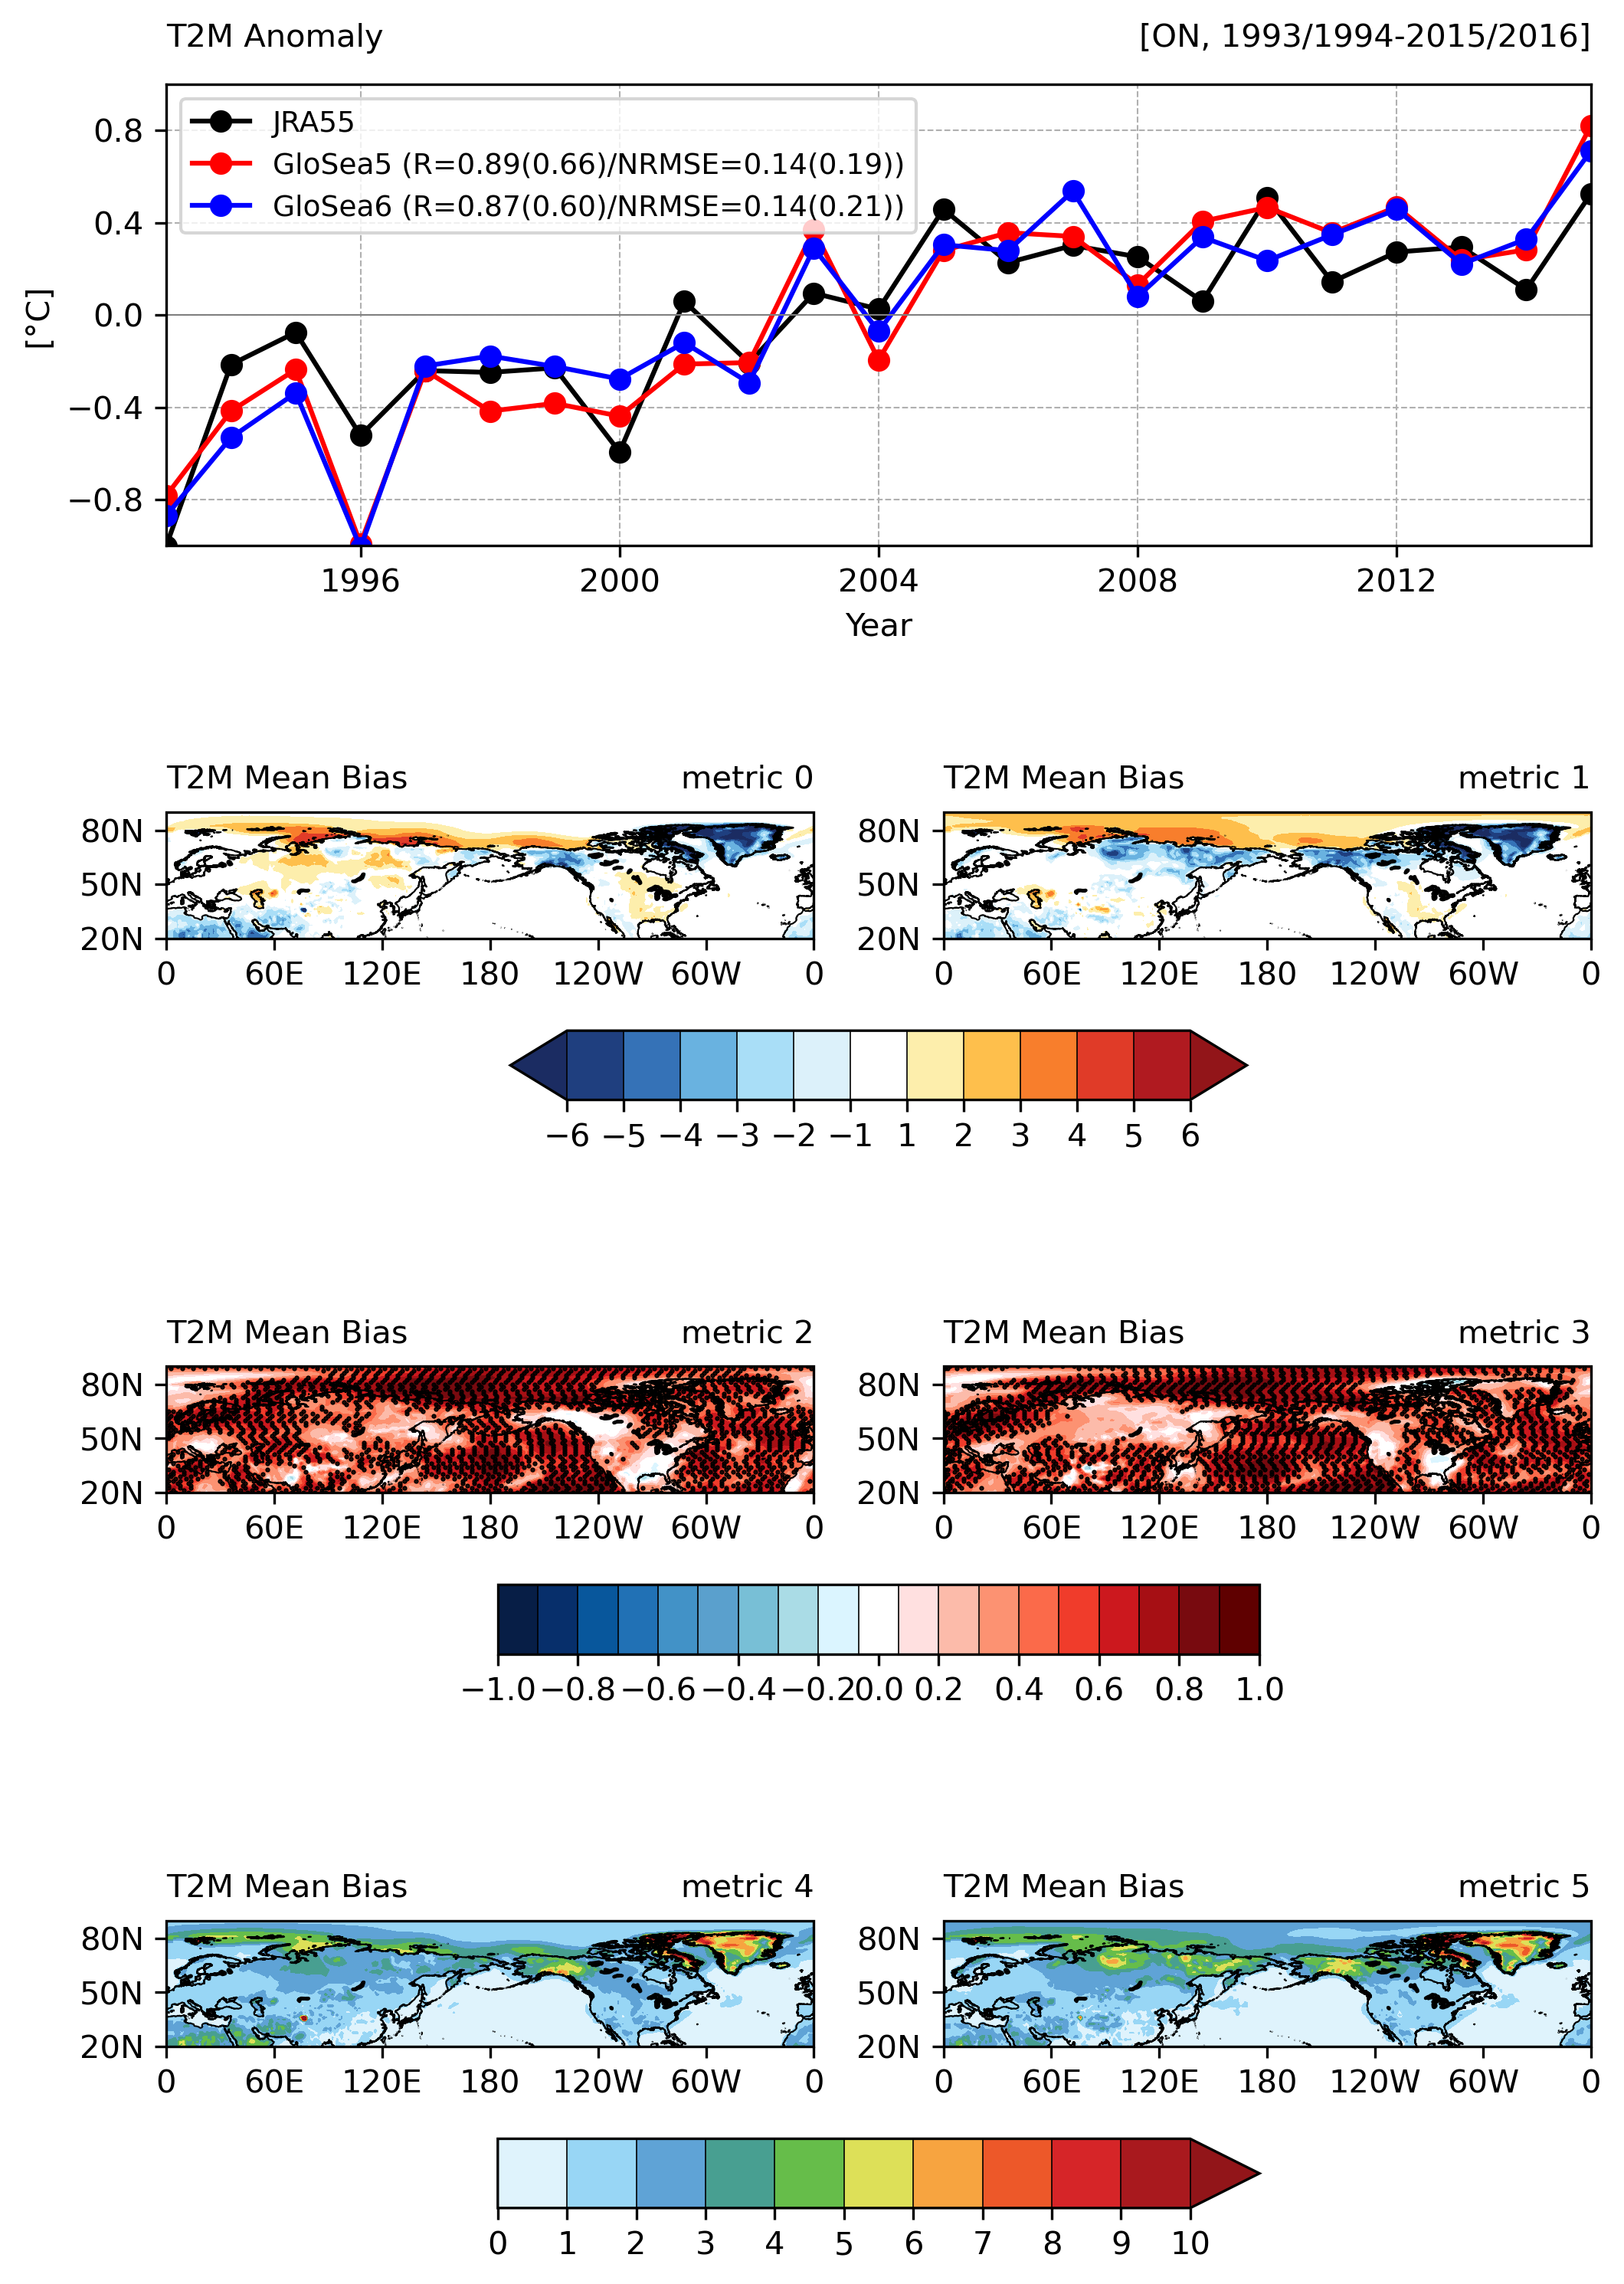

In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import cmaps
import geocat.viz as gv


def PanelLabelBar(mappable,ax,ticks,aspect):
    import matplotlib.pyplot as plt
    plt.colorbar(mappable,
             ax=ax,
             ticks=ticks,
             extendfrac='auto',
             aspect=aspect,
             drawedges=True,
             orientation='horizontal',
             pad=0.2
             )
def add_cyclic(data):
    import geocat.viz as gv
    return gv.xr_add_cyclic_longitudes(data,'longitude')

mt2m3_cdiff_gc2=add_cyclic(mt2m3_cdiff_gc2)
mt2m3_cdiff_gc32=add_cyclic(mt2m3_cdiff_gc32)

t2m3_acc_gc2=add_cyclic(t2m3_acc_gc2)
tkc3_smap_gc2=add_cyclic(tkc3_smap_gc2)
t2m3_acc_gc32=add_cyclic(t2m3_acc_gc32)
tkc3_smap_gc32=add_cyclic(tkc3_smap_gc32)

t2m3_rmse_gc2=add_cyclic(t2m3_rmse_gc2)
t2m3_rmse_gc32=add_cyclic(t2m3_rmse_gc32)

season = "ON"
min_lon=0
max_lon=360
min_lat=-90
max_lat=90

min_lat=20
max_lat=90

syr, eyr = [reg_ot2m.year.data[i] for i in [0, -1]]

fig = plt.figure(figsize=(8, 12),dpi=300)

grid = gridspec.GridSpec(nrows=4, ncols=2, figure=fig)

# Choose the map projection
proj = ccrs.PlateCarree(central_longitude=180)

ax1 = fig.add_subplot(grid[0:1,0:2])  # upper cell of grid
ax2 = fig.add_subplot(grid[1,0], projection=proj)  # middle cell of grid
ax3 = fig.add_subplot(grid[1,1], projection=proj)  # lower cell of grid
ax4 = fig.add_subplot(grid[2,0], projection=proj)  # middle cell of grid
ax5 = fig.add_subplot(grid[2,1], projection=proj)  # lower cell of grid
ax6 = fig.add_subplot(grid[3,0], projection=proj)  # middle cell of grid
ax7 = fig.add_subplot(grid[3,1], projection=proj)  # lower cell of grid


axs=[ax2, ax3, ax4, ax5, ax6, ax7]
right_title=list(range(7))


time = np.arange(syr, eyr + 1)

ax1.plot(time, reg_ot2m, label='JRA55', color='black', marker='o')
ax1.plot(time, reg_mt2m_gc2, color='red', marker='o')
ax1.plot(time, reg_mt2m_gc32, color='blue', marker='o')
ax1.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.set_xlabel('Year')  # Corrected method
ax1.set_ylabel('[°C]')  # Corrected method
gv.set_titles_and_labels(ax1,
                        lefttitle=f'T2M Anomaly',
                        righttitle=f'[ON, 1993/1994-2015/2016]',
                        lefttitlefontsize=10,
                        righttitlefontsize=10)

ax1.legend(labels=[
    'JRA55',
    f'GloSea5 (R={cor_t2m_gc2:.2f}({dcor_t2m_gc2:.2f})/NRMSE={nrmse_t2m_gc2:.2f}({dnrmse_t2m_gc2:.2f}))',
    f'GloSea6 (R={cor_t2m_gc32:.2f}({dcor_t2m_gc32:.2f})/NRMSE={nrmse_t2m_gc32:.2f}({dnrmse_t2m_gc32:.2f}))'
], loc='upper left', fontsize=9)

# Adjusting the tick parameters
# ax1.tick_params(axis='x', which='major')
# ax1.tick_params(axis='y', which='major')


ax1.set_xlim([min(time),max(time)])
ax1.set_ylim((-1,1))
ax1.set_xticks(np.arange(1996,2013,4))
ax1.set_yticks(np.arange(-0.8, 0.81, 0.4))

for i in range(len(axs)):
    ax=axs[i]
    # Use geocat.viz.util convenience function to set axes tick values
    ax.coastlines(resolution='10m', color='black', linewidth=0.5)
    ax.add_feature(cfeature.LAKES, edgecolor='black')
    gv.set_axes_limits_and_ticks(ax=ax,
                                 xlim=(-180, 180),
                                 ylim=(min_lat, max_lat),
                                 yticks=np.arange(min_lat, max_lat, 30),
                                 xticks=np.arange(-180, 181, 60))

    # Use geocat.viz.util convenience function to make plots look like NCL
    # plots by using latitude, longitude tick labels
    gv.add_lat_lon_ticklabels(ax)

    # Remove the degree symbol from tick labels
    ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
    ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol=''))

    # Use geocat.viz.util convenience function to set titles
    gv.set_titles_and_labels(ax,
                             lefttitle=f'T2M Mean Bias',
                             righttitle=f'metric {right_title[i]}',
                             lefttitlefontsize=10,
                             righttitlefontsize=10)

aspect=10
cmap=cmaps.BlueWhiteOrangeRed
v= np.linspace(-6, 6, 13)
v=v[v!=0]

C = ax2.contourf(mt2m3_cdiff_gc2['longitude'].data,
    mt2m3_cdiff_gc2['latitude'].data,
    mt2m3_cdiff_gc2.data,
    transform=ccrs.PlateCarree(),
    levels=v,
    cmap=cmap,
    extend='both')

ax3.contourf(mt2m3_cdiff_gc32['longitude'].data,
    mt2m3_cdiff_gc32['latitude'].data,
    mt2m3_cdiff_gc32.data,
    transform=ccrs.PlateCarree(),
    levels=v,
    cmap=cmap,
    extend='both')

PanelLabelBar(C,[ax2, ax3],v,aspect-1)


cmap=cmaps.temp_diff_18lev
v=v = np.linspace(-1, 1, 21)
v=v[v!=0]

C2 = ax4.contourf(t2m3_acc_gc2['longitude'].data,
    t2m3_acc_gc2['latitude'].data,
    t2m3_acc_gc2.data,
    transform=ccrs.PlateCarree(),
    levels=v,
    cmap=cmap,
    extend='neither')

lon=tkc3_smap_gc2['longitude']
lat=tkc3_smap_gc2['latitude']

lon2d, lat2d = np.meshgrid(lon, lat)
thinning_factor=5

significance_threshold = 0.05
significant_points = tkc3_smap_gc2 <= significance_threshold

ax4.scatter(lon2d[significant_points][::thinning_factor], lat2d[significant_points][::thinning_factor], color='black', marker='.', s=1, transform=ccrs.PlateCarree())

ax5.contourf(t2m3_acc_gc32['longitude'].data,
    t2m3_acc_gc32['latitude'].data,
    t2m3_acc_gc32.data,
    transform=ccrs.PlateCarree(),
    levels=v,
    cmap=cmap,
    extend='neither')

significant_points = tkc3_smap_gc32 <= significance_threshold

ax5.scatter(lon2d[significant_points][::thinning_factor], lat2d[significant_points][::thinning_factor], color='black', marker='.', s=1, transform=ccrs.PlateCarree())


v=np.linspace(-1, 1, 11)

PanelLabelBar(C2,[ax4, ax5],v,aspect+1)

cmap=cmaps.WhiteBlueGreenYellowRed
v=v = np.linspace(0, 10, 11)

C3 = ax6.contourf(t2m3_rmse_gc2['longitude'].data,
    t2m3_rmse_gc2['latitude'].data,
    t2m3_rmse_gc2.data,
    transform=ccrs.PlateCarree(),
    levels=v,
    cmap=cmap,
    extend='max')

ax7.contourf(t2m3_rmse_gc32['longitude'].data,
    t2m3_rmse_gc32['latitude'].data,
    t2m3_rmse_gc32.data,
    transform=ccrs.PlateCarree(),
    levels=v,
    cmap=cmap,
    extend='max')

PanelLabelBar(C3,[ax6, ax7],v,aspect)

# ofile="../1.ACC_RMSE/Figure/1-1_ACC_RMSE_T2M_GPH_"+season+""
# plt.savefig(ofile, bbox_inches='tight')
# plt.close()
plt.show()